<a href="https://colab.research.google.com/github/blondedman/optimization-of-nuSVC/blob/main/optimization-of-nuSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
import random as r

import numpy as np
import pandas as pd

from sklearn.svm import NuSVC
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category = FitFailedWarning)

In [3]:
bestAccuracy = 0

bestKernel = ""
bestNu = 0       # [0,1]

iterations = 10

kernels = ['poly', 'sigmoid', 'linear', 'rbf']

In [5]:
df = pd.read_csv('HTRU_2.csv')

In [6]:
df.head()

,profile_mean,profile_stdev,profile_skewness,profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [8]:
X = df.iloc[:,0:-1]
y = df['class']

In [9]:
samples = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [10]:
result = pd.DataFrame(columns=['sample', 'Best Accuracy', 'Best Kernel', 'Best Nu'])

##Fitness Function

In [12]:
def fitnessFunction(k, n):
    # train model (classification)
    model = NuSVC(kernel=k, nu=n)
    model.fit(X_train, y_train)  # Replace with your data

    # predictions from model
    predicted = model.predict(X_test)  # No rounding needed

    # calculate accuracy
    accuracy = round(accuracy_score(y_test, predicted) * 100, 2
                     )
    return accuracy

## Calling Function

In [13]:
for i in range(len(samples)):

  best_accuracy = 0
  best_nu = 0

  for kernel in kernels:

    X_train, X_test, y_train, y_test = samples[i]

    sc = StandardScaler()

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # convert labels to numeric codes (0, 1, 2, ...)
    numeric_labels, unique_classes = pd.factorize(y_train)

    # now use numeric_labels instead of y_train for calculations
    class_proportions = np.bincount(numeric_labels) / len(numeric_labels)
    max_nu = np.min(class_proportions)

    nu = r.uniform(0.001, max_nu)

    score = fitnessFunction(kernel, nu)

    print(score, kernel, nu)

    if score > best_accuracy:

      best_kernel = kernel
      best_nu = nu

      best_accuracy = score

    print(best_accuracy, best_kernel, best_nu)

  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_nu)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_nu]

17.82 poly 0.0012051982836433254
17.82 poly 0.0012051982836433254
15.92 sigmoid 0.06736422872536879
17.82 poly 0.0012051982836433254
94.9 linear 0.04932293326573107
94.9 linear 0.04932293326573107
97.58 rbf 0.028538453061388785
97.58 rbf 0.028538453061388785
Best Accuracy =  97.58 Best Kernel =  rbf Best Nu =  0.028538453061388785
96.91 poly 0.07353625603165047
96.91 poly 0.07353625603165047
17.69 sigmoid 0.04423312902654965
96.91 poly 0.07353625603165047
98.08 linear 0.05229246218411424
98.08 linear 0.05229246218411424
97.56 rbf 0.07759253384567473
98.08 linear 0.05229246218411424
Best Accuracy =  98.08 Best Kernel =  linear Best Nu =  0.05229246218411424
96.35 poly 0.08858458928496983
96.35 poly 0.08858458928496983
20.8 sigmoid 0.004923914262570817
96.35 poly 0.08858458928496983
49.48 linear 0.015719620984369333
96.35 poly 0.08858458928496983
90.63 rbf 0.0072188840023804405
96.35 poly 0.08858458928496983
Best Accuracy =  96.35 Best Kernel =  poly Best Nu =  0.08858458928496983
96.33 

In [14]:
result.head(10)

,sample,Best Accuracy,Best Kernel,Best Nu
0,1,97.58,rbf,0.028538
1,2,98.08,linear,0.052292
2,3,96.35,poly,0.088585
3,4,97.62,rbf,0.052186
4,5,97.90,linear,0.059785
5,6,96.98,poly,0.076503
6,7,97.60,rbf,0.083313
7,8,97.45,rbf,0.083228
8,9,97.73,rbf,0.050074
9,10,97.95,linear,0.051844


## Manual Method

In [ ]:
splits = []

for seed in range(10):
    train, test = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['class'])
    splits.append({'train': train, 'test': test})


print(f"split 0 - train shape: {splits[0]['train'].shape}, test shape: {splits[0]['test'].shape}")

split 0 - train shape: (12528, 9), test shape: (5370, 9)


In [ ]:
split = splits[0]

# training data
X_train = split['train'].drop(columns=['class'])
y_train = split['train']['class']

# testing data
X_test = split['test'].drop(columns=['class'])
y_test = split['test']['class']

In [ ]:
def fitnessFunction(k, n):
    # train model (classification)
    model = NuSVC(kernel=k, nu=n)
    model.fit(X_train, y_train)  # Replace with your data

    # predictions from model
    predicted = model.predict(X_test)  # No rounding needed

    # calculate accuracy
    accuracy = round(accuracy_score(y_test, predicted) * 100, 2
                     )
    return accuracy

In [ ]:
# convert labels to numeric codes (0, 1, 2, ...)
numeric_labels, unique_classes = pd.factorize(y_train)

# now use numeric_labels instead of y_train for calculations
class_proportions = np.bincount(numeric_labels) / len(numeric_labels)
max_nu = np.min(class_proportions)

In [ ]:
for i in range(iterations):

  # choosing parameters randomly
  k = r.sample(kernelList, 1)[0]
  n = r.uniform(0.001, max_nu)

  try:
    accuracy = fitnessFunction(k, n)
  except ValueError:
    continue

  print(accuracy, k, n)

  if accuracy > bestAccuracy:

    bestKernel = k
    bestNu = n

    bestAccuracy = accuracy

  print(bestAccuracy, bestKernel, bestNu)
  print(f'')

97.84 rbf 0.04608989290197138
97.84 rbf 0.04608989290197138

18.23 sigmoid 0.023442907222588714
97.84 rbf 0.04608989290197138

10.56 sigmoid 0.06255619035730044
97.84 rbf 0.04608989290197138

29.27 poly 0.018753869978902868
97.84 rbf 0.04608989290197138

92.59 sigmoid 0.08904077566794227
97.84 rbf 0.04608989290197138

97.71 poly 0.05969303003094465
97.84 rbf 0.04608989290197138

18.29 sigmoid 0.024052750984528234
97.84 rbf 0.04608989290197138

2.35 linear 0.021142980828450716
97.84 rbf 0.04608989290197138

97.09 linear 0.08510588203809058
97.84 rbf 0.04608989290197138

13.45 sigmoid 0.045299109067396495
97.84 rbf 0.04608989290197138



## Convergence Graph

In [15]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
train_sizes, train_scores, test_scores = learning_curve(
    NuSVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
          nu=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
          max_iter = 1000),
    X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01, 1.0, 50))

In [19]:
train_sizes

array([  112,   340,   568,   796,  1023,  1251,  1479,  1707,  1935,
        2162,  2390,  2618,  2846,  3074,  3301,  3529,  3757,  3985,
        4213,  4440,  4668,  4896,  5124,  5352,  5579,  5807,  6035,
        6263,  6491,  6718,  6946,  7174,  7402,  7630,  7857,  8085,
        8313,  8541,  8769,  8996,  9224,  9452,  9680,  9908, 10135,
       10363, 10591, 10819, 11047, 11275])

In [20]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

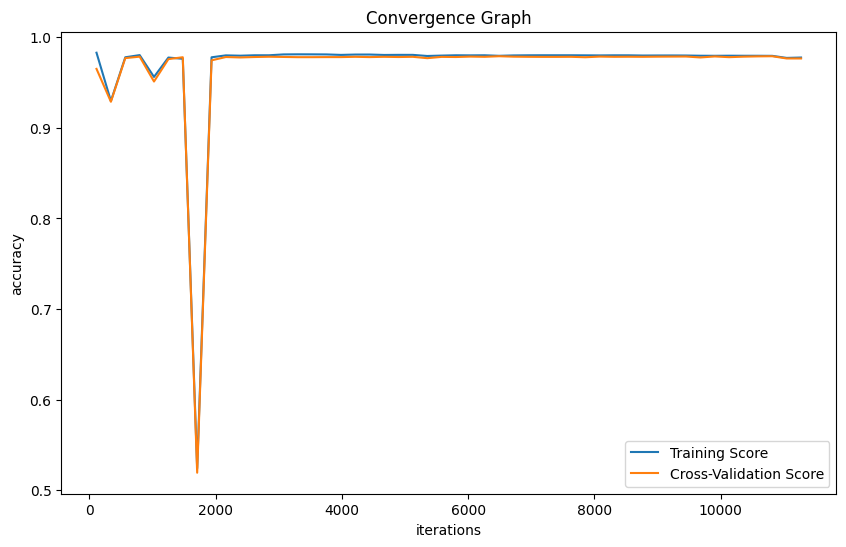

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()